### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Setup

In [3]:
# Clearing up the directory
current_folder = os.path.dirname(os.path.abspath("visualize_results.ipynb"))
project = os.path.dirname(current_folder)
processed_dir = os.path.join(project, "data", "processed")
results_dir = os.path.join(project, "results")

# Read data
data_path = os.path.join(processed_dir, "geo_arbitrage_with_residuals.csv")

# Converting to dataframe
df = pd.read_csv(data_path)

# Visualization setup
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Scatterplot (Cost vs Quality)

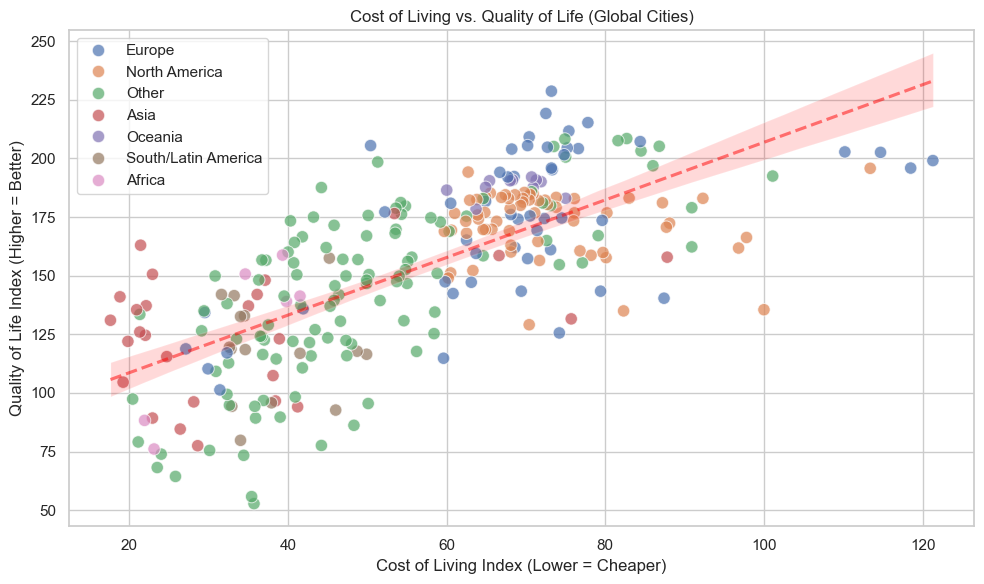

In [6]:
sns.scatterplot(data=df, x='Cost_Index', y='Quality_Index', hue='Region', alpha=0.7, s=80)

# Draw a regression line to show expected value
sns.regplot(data=df, x='Cost_Index', y='Quality_Index', scatter=False, color='red', line_kws={"linestyle": "--", "alpha":0.5})

# Set up other parameters
plt.title('Cost of Living vs. Quality of Life (Global Cities)')
plt.xlabel('Cost of Living Index (Lower = Cheaper)')
plt.ylabel('Quality of Life Index (Higher = Better)')
plt.legend(loc='upper left') # Put legend in the upper left corner to better present the results
plt.tight_layout()
plt.show()

save_path1 = os.path.join(results_dir, "scatter_cost_quality.png")
plt.savefig(save_path1)
plt.close()

### Bar Graph (Top 10 Cities)

C:\Users\simon\AppData\Local\Temp\ipykernel_3124\2261204432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Geo_Arbitrage_Score', y='City_Short', palette='viridis')


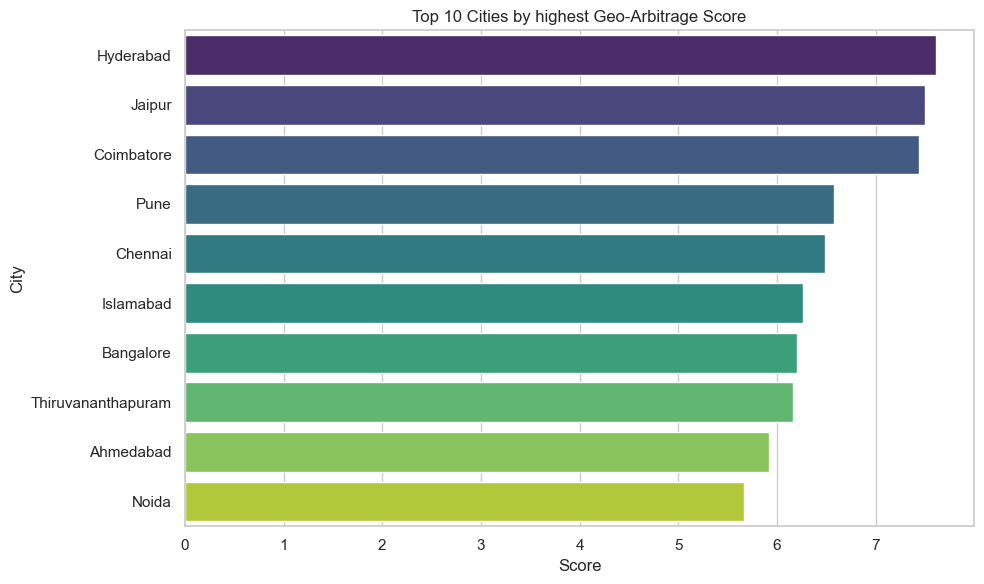

In [10]:
plt.figure()

# Select the top 10 city with 10 top 10 GA Scores
top_10 = df.sort_values(by='Geo_Arbitrage_Score', ascending=False).head(10)
# Drop the country name after the city name
top_10['City_Short'] = top_10['City'].astype(str).apply(lambda x: x.split(',')[0])

# Set up other parameters
sns.barplot(data=top_10, x='Geo_Arbitrage_Score', y='City_Short', palette='viridis')
plt.title('Top 10 Cities by highest Geo-Arbitrage Score')
plt.xlabel('Score')
plt.ylabel('City')
plt.tight_layout()
plt.show()

save_path2 = os.path.join(results_dir, "bar_top_10_value.png")
plt.savefig(save_path2, dpi=300)
plt.close()

### Heatmap (Correlation Matrix)

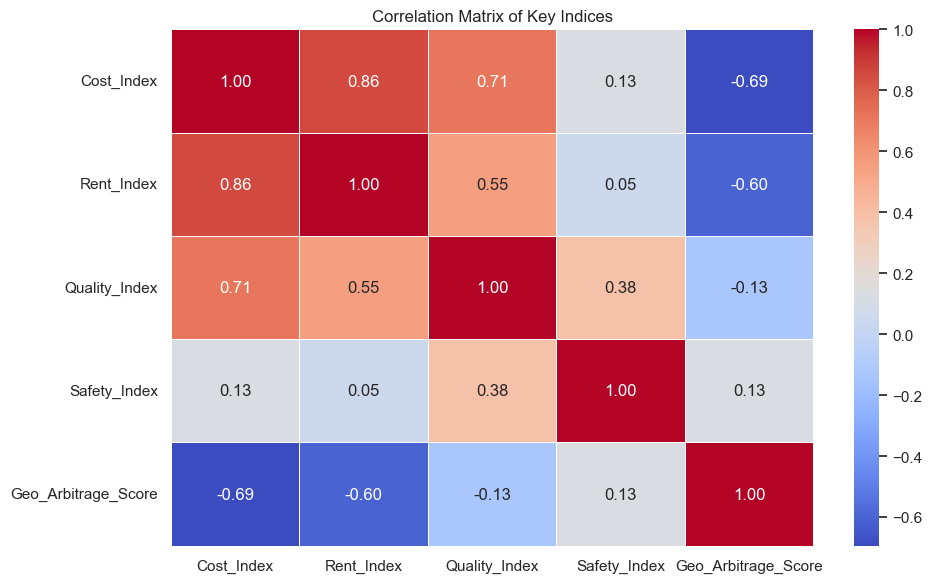

In [11]:
plt.figure()

# Selecting only numeric columns
numeric_cols = ['Cost_Index', 'Rent_Index', 'Quality_Index', 'Safety_Index', 'Geo_Arbitrage_Score']
numeric_cols = [c for c in numeric_cols if c in df.columns]

# Calculating correlations for numeric columns and set up the heatmap
if numeric_cols:
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Key Indices')
    plt.tight_layout()
    plt.show()
    
    save_path3 = os.path.join(results_dir, "heatmap_correlation.png")
    plt.savefig(save_path3, dpi=300)
    plt.close()